# Pacman simulation

# 1. Data simulation

In [1]:
from numpy.random import choice, normal
import statsmodels.formula.api as smf
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

random.seed(1234)

n = 100

distance = choice([0, 0.5, 1], n)
price = 10 - 3*distance + normal(loc=0, scale=.5, size=n)
customers = 30 - 2*price - 10*distance + normal(loc=0, scale=2, size=n)

df = pd.DataFrame({'price': price, 'distance': distance, 'customers': customers})

# 2. Impact of price

Running a linear regression

In [2]:
print(smf.ols(formula="customers ~ price", data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:              customers   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     23.11
Date:                Tue, 16 Jan 2024   Prob (F-statistic):           5.52e-06
Time:                        21:56:25   Log-Likelihood:                -232.49
No. Observations:                 100   AIC:                             469.0
Df Residuals:                      98   BIC:                             474.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6932      1.552      0.447      0.6

We see that the coefficient of the price is positive, which shouldn’t be
like this (we know for sure that it should be -2)

If we plot the data, we see that there is a positive trend of the price
into the number of customers, so it is not a problem of the linear
regression.

<Axes: xlabel='price', ylabel='customers'>

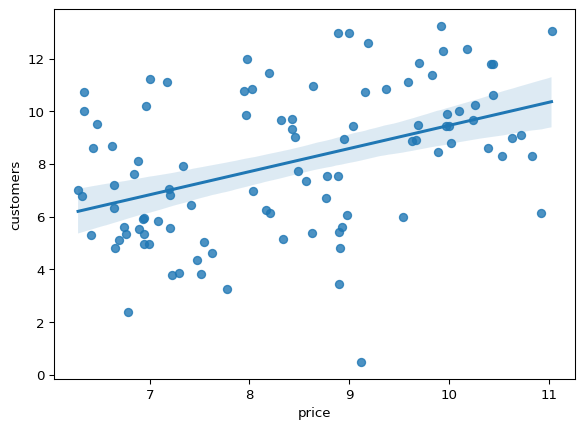

In [3]:
sns.regplot(x = 'price', y = 'customers', data=df)

If we plot the data including the distance we can see that the distance
is acting as a confounder

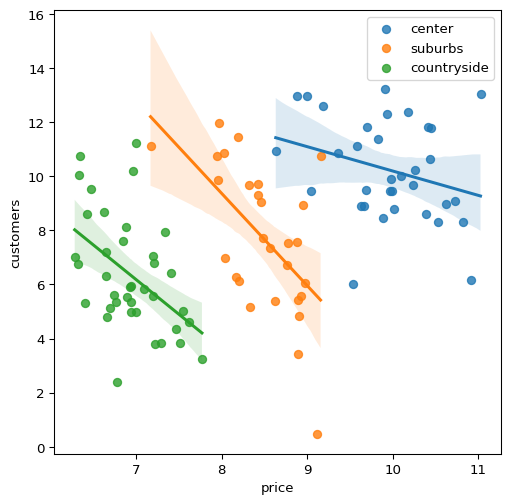

In [4]:
fig, ax = plt.subplots(figsize=(6, 6))

df_0 = df[df['distance'] == 0.0]
df_05 = df[df['distance'] == 0.5]
df_1 = df[df['distance'] == 1.0]

sns.regplot(x = 'price', y = 'customers', data=df_0, ax=ax, label='center')
sns.regplot(x = 'price', y = 'customers', data=df_05, ax=ax, label='suburbs')
sns.regplot(x = 'price', y = 'customers', data=df_1, ax=ax, label='countryside')
ax.legend()
plt.show()

Now we include the distance into the regression and we see that the
coefficient of price is close to the real coefficient.

In [5]:
print(smf.ols(formula='customers ~ price + distance', data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:              customers   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     42.75
Date:                Tue, 16 Jan 2024   Prob (F-statistic):           4.86e-14
Time:                        21:56:26   Log-Likelihood:                -211.47
No. Observations:                 100   AIC:                             428.9
Df Residuals:                      97   BIC:                             436.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.5221      4.242      6.959      0.0

# 3. Impact of distance

When we are interested in measuring the total effect, since the distance
has no confounders, we can directly run the regression

In [6]:
print(smf.ols(formula="customers ~ distance", data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:              customers   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     53.36
Date:                Tue, 16 Jan 2024   Prob (F-statistic):           7.48e-11
Time:                        21:56:26   Log-Likelihood:                -221.34
No. Observations:                 100   AIC:                             446.7
Df Residuals:                      98   BIC:                             451.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.0595      0.354     28.424      0.0

Obtaining a coefficient of the distance that is close to the -4 that it
is expected to be